  # Project: noshow appointment data analysis


## Table of Contents 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
 
    This project will analyzing data associated with medical appointments in Brazil and explore the reasons which effective on patients Presence. 


### Dataset Description 

    This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


### Question(s) for Analysis
    Which attribute effetive on patients Presence?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling
 
    In this section we reading, cleaning and manipulating data.   

### General Properties

    

loading and reading data

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


number of rows and columns

In [4]:
df.shape

(110527, 14)

the describtive properties

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


df informations

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there no null values


### Data Cleaning
 
    In this part we cleanind and manipulating data 

droping the not important columns in our analysis

In [7]:
df.drop(['ScheduledDay','PatientId','AppointmentID'],axis =1, inplace =True)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


rename the No-show column

In [8]:
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


histograms to our attributes

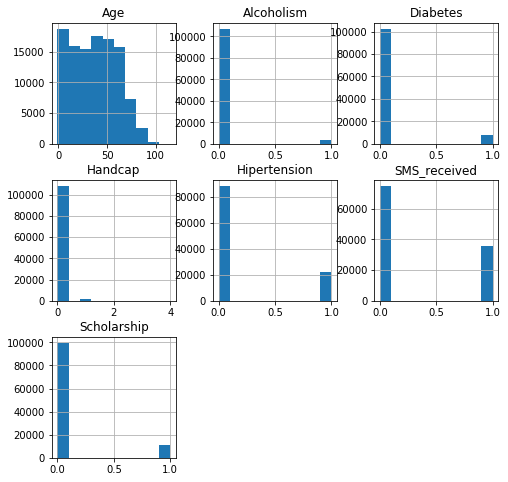

In [9]:
df.hist(figsize=(8,8));

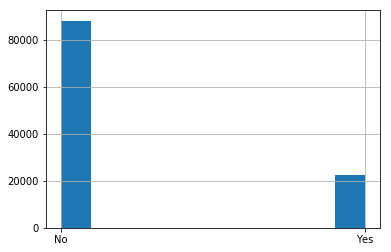

In [10]:
df['No_show'].hist()

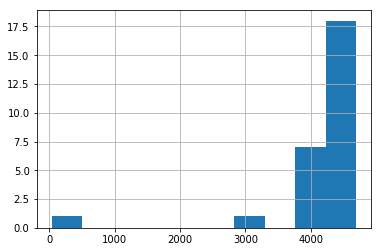

In [11]:
df['AppointmentDay'].value_counts().hist();

In [12]:
presence = df.No_show == 'No'
notpresence = df.No_show == 'Yes'

In [13]:
df[presence].mean(),df[notpresence].mean()

(Age             37.790064
 Scholarship      0.093903
 Hipertension     0.204392
 Diabetes         0.073837
 Alcoholism       0.030417
 Handcap          0.022742
 SMS_received     0.291334
 dtype: float64, Age             34.317667
 Scholarship      0.115507
 Hipertension     0.169004
 Diabetes         0.064071
 Alcoholism       0.030333
 Handcap          0.020297
 SMS_received     0.438371
 dtype: float64)

<a id='eda'></a>
## Exploratory Data Analysis

 In this section after cleaning data we search about the attributes which effective on data

 

# Which attribute effetive on patients Presence?

# does the Gender effective on patients presence?

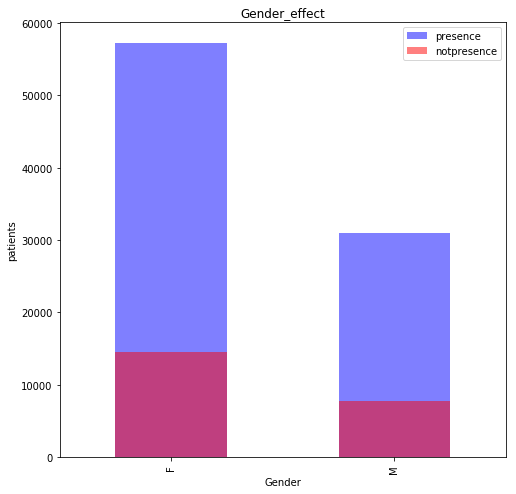

In [14]:
plt.figure(figsize=(8,8))
df.Gender[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.Gender[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('Gender_effect')
plt.xlabel('Gender')
plt.ylabel('patients');

From the graph donot clear a strong effect.
so we cannot say the gender effective on presence.

# does the AppointmentDay effective on patients presence?

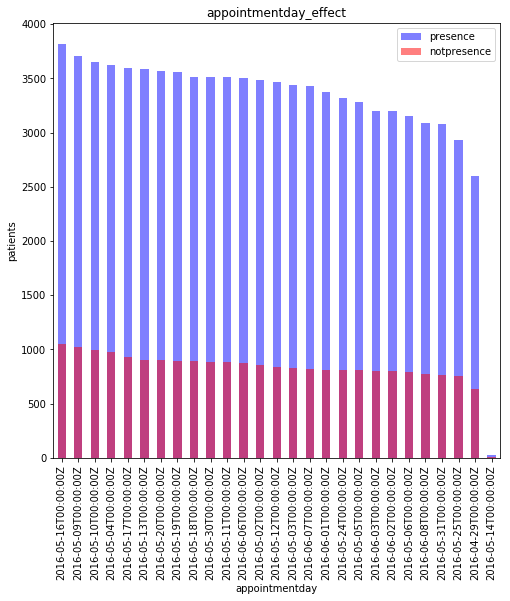

In [15]:
plt.figure(figsize=(8,8))
df.AppointmentDay[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.AppointmentDay[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('appointmentday_effect')
plt.xlabel('appointmentday')
plt.ylabel('patients');

From the graph there isnot  strong effect.
so we cannot say the appointment day effective on presence.

 # does the Age effective on patients presence?

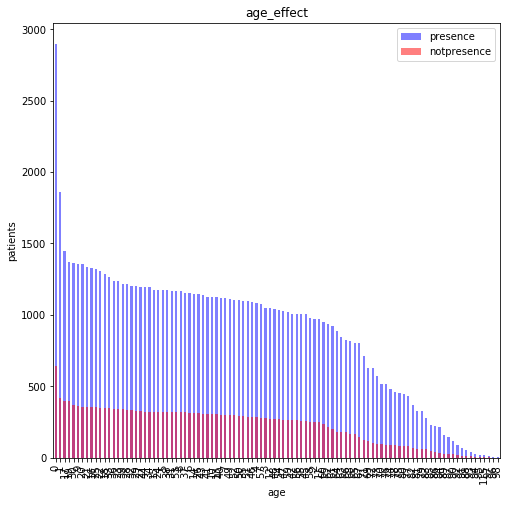

In [16]:
does the Age effective on patients presence?
plt.figure(figsize=(8,8))
df.Age[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.Age[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('age_effect')
plt.xlabel('age')
plt.ylabel('patients');
plt.figure(figsize=(8,8))

In [ ]:
does the Age effective on patients presence

In [17]:
does the Age effective on patients presence

SyntaxError: invalid syntax (<ipython-input-17-ad14203e6f5b>, line 1)

The graph showes an inverse relation between the patients and the age
while the age increase the patients presense decrease

# does the Neighbourhood effective on patients presence?

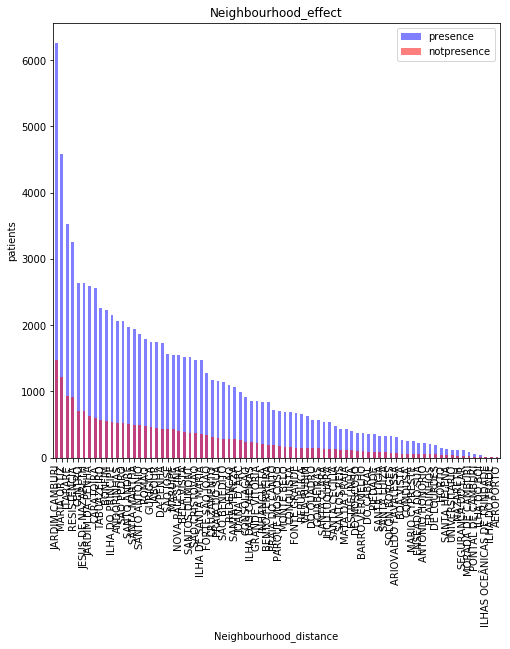

In [18]:
plt.figure(figsize=(8,8))
df.Neighbourhood[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.Neighbourhood[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('Neighbourhood_effect')
plt.xlabel('Neighbourhood_distance')
plt.ylabel('patients');

The graph showes an inverse relation between the patients and the Neighbourhood distance
while the Neighbourhood distance increase the patients presense decrease.

# does the Scholarship effective on patients presence?

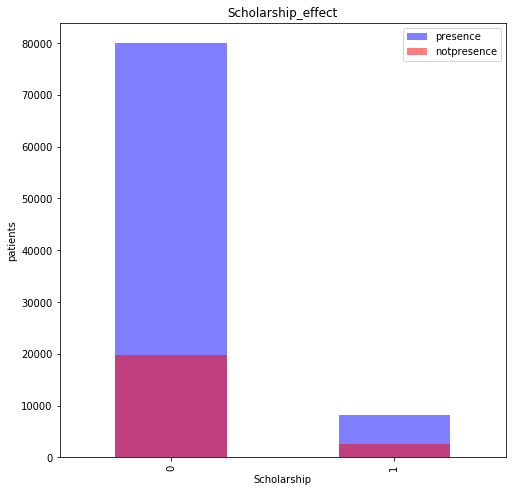

In [19]:
plt.figure(figsize=(8,8))
df.Scholarship[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.Scholarship[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('Scholarship_effect')
plt.xlabel('Scholarship')
plt.ylabel('patients');

From the graph there isnot  strong effect.
so we cannot say the Scholarship effective on presence.

# does the Hipertension effective on patients presence?

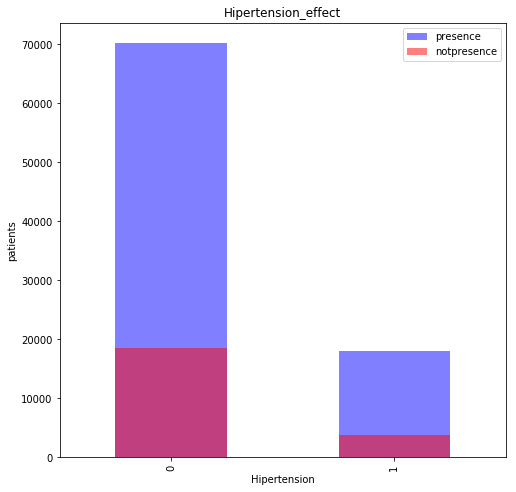

In [20]:
plt.figure(figsize=(8,8))
df.Hipertension[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.Hipertension[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('Hipertension_effect')
plt.xlabel('Hipertension')
plt.ylabel('patients');

From the graph there isnot  strong effect.
so we cannot say the Hipertension effective on presence.

# does the Diabetes effective on patients presence?

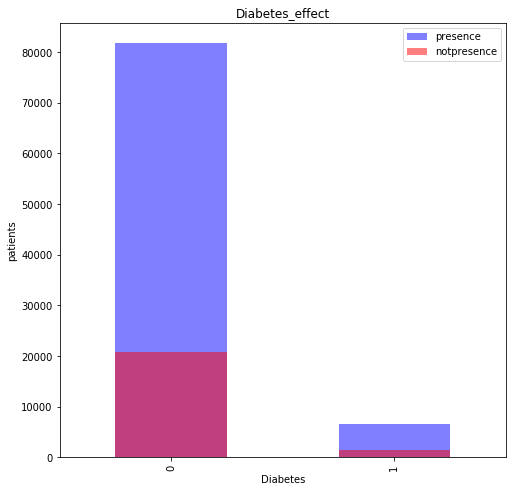

In [21]:
plt.figure(figsize=(8,8))
df.Diabetes[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.Diabetes[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('Diabetes_effect')
plt.xlabel('Diabetes')
plt.ylabel('patients');

From the graph there isnot  strong effect.
so we cannot say the Diabetes effective on presence.

# does the Alcoholism effective on patients presence?

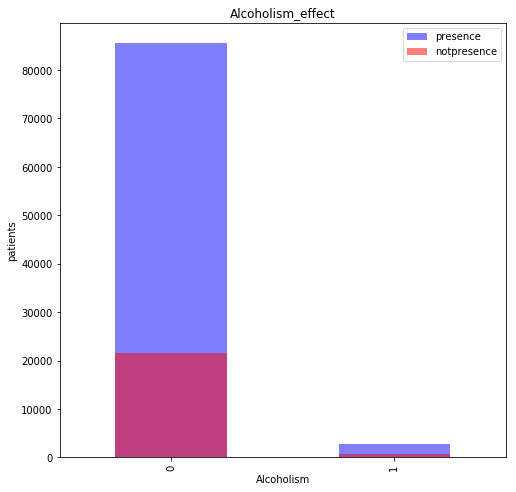

In [22]:
plt.figure(figsize=(8,8))
df.Alcoholism[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.Alcoholism[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('Alcoholism_effect')
plt.xlabel('Alcoholism')
plt.ylabel('patients');

From the graph there isnot  strong effect.
so we cannot say the Alcoholism effective on presence.

# does the Handcap effective on patients presence?

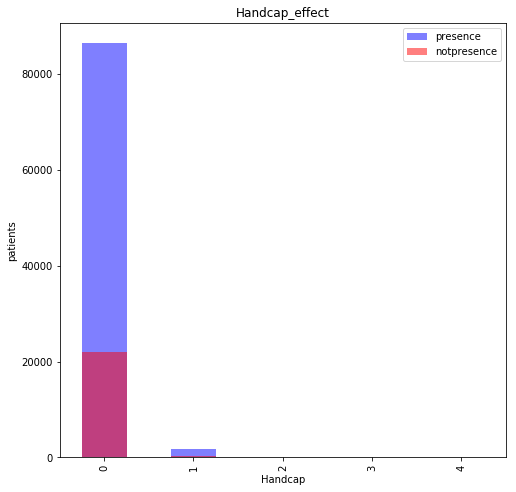

In [23]:
plt.figure(figsize=(8,8))
df.Handcap[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.Handcap[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('Handcap_effect')
plt.xlabel('Handcap')
plt.ylabel('patients');

From the graph there isnot  strong effect.
so we cannot say the Handcap effective on presence

# does the SMS_received effective on patients presence?

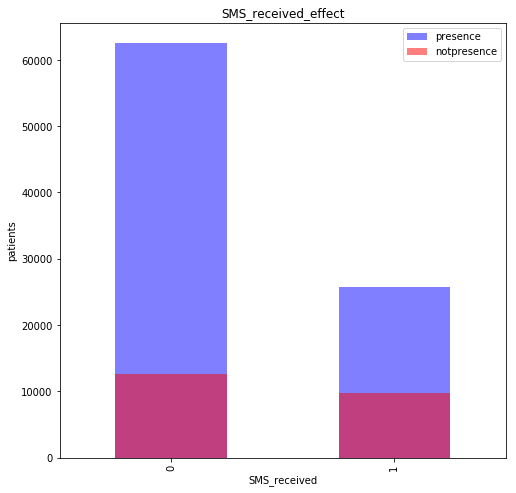

In [24]:
plt.figure(figsize=(8,8))
df.SMS_received[presence].value_counts().plot(kind='bar',alpha=.5,color='blue',label='presence')
df.SMS_received[notpresence].value_counts().plot(kind='bar',alpha=.5,color='red',label='notpresence')
plt.legend()
plt.title('SMS_received_effect')
plt.xlabel('SMS_received')
plt.ylabel('patients');

about 77% of patients who did not recieved sms presence
and about 60% of patients who recieved sms presence
so the sms should be reviewed

<a id='conclusions'></a>
## Conclusions

    From our analysis we concluse that:
    1- the sms_recieved should be reviewed
    2- all of Gender, AppointmentDay, Scholarship, Hipertension, Diabetes, Alcoholism and Handcap donot effective on the patients presence.
    3-the age effective on patients presence, the younger patients are more presen than the older patients.
    4-the Neighbourhood_distance effective on petients presence, while the Neighbourhood near,the number of patients presence increase.
    
    
## limitaions
    
    threr is no  clear relation between presenc and Gender, AppointmentDay, Scholarship, Hipertension, Diabetes, Alcoholism and Handcap.
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])